In [13]:
import torch

from Tencode import PFORT_encode
from torchvision.transforms import transforms
import h5py
modss=PFORT_encode(ATTlays=6, bhlay=9, imglay=5, dim=512, heads=8, inner_dim=512, out_dim=48, pos_emb_drop=0.1,
                         mlpdropout=0.05, attdropout=0.05)
# aaaa = dastset('映射.json', 'fix1.json', './i')
modss=modss.load_from_checkpoint('./post_LN/V6-epoch06-6-240000.ckpt',ATTlays=6, bhlay=9, imglay=5, dim=512, heads=8, inner_dim=512, out_dim=48, pos_emb_drop=0.1,
                         mlpdropout=0.05, attdropout=0.05)
modss.eval().cuda()


with h5py.File('V2_dataset_stage21.hdf5', 'r') as f:
    # for i in f:
    #     print(i)
    aaa=f['34_266'][()]
# transform1 = transforms.Compose([
#             transforms.ToTensor(),  # range [0, 255] -> [0.0,1.0]
#         ]
#         )


torch.Size([1, 512, 8, 8])


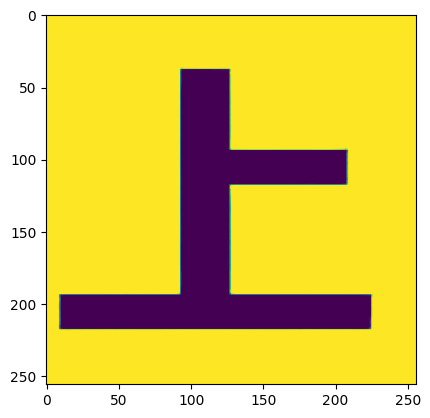

In [27]:
from matplotlib import pyplot as plt
with h5py.File('V2_dataset_stage21.hdf5', 'r') as f:
    # for i in f:
    #     print(i)
    aaa=f['33_6'][()]
print(torch.tensor(aaa).unsqueeze(0).shape)
opop=modss.decodess(torch.tensor(aaa).cuda().unsqueeze(0)).squeeze(0).cpu().detach().numpy()
plt.imshow(opop[0])